Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI U OPTICI
## 18.05.2021. 

# Nikola Stanković 2020/15

***
<font color='red'>
Preimenovati svesku: File/Rename u __optika_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Interferencija na tankom filmu
Staklena pločica indeksa prelamanja $n_{s} = 1.5$ prekrivena je tankim slojem magnezijum-fluorida indeksa prelamanja $n_{1} = 1.36$. Debljina ovog filma je $d = 101$ nm. Sistem se nalazi u vazduhu koji ima indeks prelamanja jednak jedinici. Sastaviti programski kod koji računa reflektansu $R$ i transmitansu $T$ u zavisnosti od talasne dužine $\lambda$. Talasnu dužinu definisati kao niz i opsegu od 380 do 750 nm (vidljivi deo spektra) sa korakom od 1 nm. Smatrati da svetlost pada upravno na pločicu. Voditi računa o tome da je prirodna svetlost nepolarizovana, tj. podjednaka mešavina TE i TM polarizacije. Permitivnost i permeabilnost vakuuma iznose 8.854e-12 i 12.56e-7, respektivno, u odgovarajućim jedinicama.

Nacrtati grafike $R(\lambda)$, $T(\lambda)$ kao i zbir $R(\lambda) + T(\lambda)$. Prokomentarisati rezultat koji se dobija za zbir reflektanse i transmitanse.

Odrediti minimum reflektanse ovako projektovane strukture i objasniti smisao ovog minimuma.

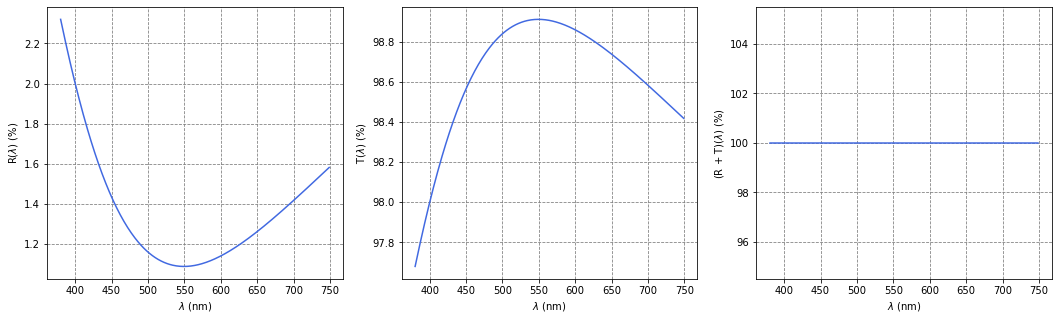

In [72]:
import numpy as np
import matplotlib.pyplot as plt

lam = np.arange(380e-9, 750e-9, 1e-9)

epsilon0 = 8.854e-12
mi0 = 12.56e-7
n0 = 1
n1 = 1.36
ns = 1.5
d = 101e-9

thetai1 = 0
thetat1 = np.arcsin(n0 * np.sin(thetai1) / n1)
thetai2 = thetat1
thetat2 = np.arcsin(n1 * np.sin(thetai2) / ns)

Y0TE = np.sqrt(epsilon0 / mi0) * n0 * np.cos(thetai1)
Y0TM = np.sqrt(epsilon0 / mi0) * n0 / np.cos(thetai1)
Y1TE = np.sqrt(epsilon0 / mi0) * n1 * np.cos(thetat1)
Y1TM = np.sqrt(epsilon0 / mi0) * n1 / np.cos(thetat1)
YsTE = np.sqrt(epsilon0 / mi0) * ns * np.cos(thetat2)
YsTM = np.sqrt(epsilon0 / mi0) * ns / np.cos(thetat2)

h = n1 * d * np.cos(thetai2)
k0 = 2 * np.pi / lam

m11TE = np.cos(k0 * h)
m12TE = 1j * np.sin(k0 * h) / Y1TE
m21TE = 1j * Y1TE * np.sin(k0 * h)
m22TE = np.cos(k0 * h)

m11TM = np.cos(k0 * h)
m12TM = 1j * np.sin(k0 * h) / Y1TM
m21TM = 1j * Y1TM * np.sin(k0 * h)
m22TM = np.cos(k0 * h)
#m-ovi su nizovi brojeva i ispod ce biti nizovi brojeva
#za mnozenje matrica ne sme da nam bude niz u matrici, mora sve kroz for, tal. duz kroz tal duz.
# za svaku talasnu duzinu racunamo r, i t i onda prelazimo u sledecu iteraciju

rTE = (Y0TE*m11TE + Y0TE*YsTE*m12TE - m21TE - YsTE*m22TE) / (Y0TE*m11TE + Y0TE*YsTE*m12TE + m21TE + YsTE*m22TE)
rTM = (Y0TM*m11TM + Y0TM*YsTM*m12TM - m21TM - YsTM*m22TM) / (Y0TM*m11TM + Y0TM*YsTM*m12TM + m21TM + YsTM*m22TM)
#rTe i Rtm ce biti kompleksni

RTE = np.abs(rTE) ** 2
# RTE = RTE * np.conj(RTE)
RTM = np.abs(rTM) ** 2
R = 0.5 * (RTE + RTM)
T = 1 - R

plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
plt.plot(lam / 1e-9, R * 100, color = 'royalblue', label = 'R')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R($\lambda$) (%)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
#plt.show()

plt.subplot(1,3,2)
plt.plot(lam / 1e-9, T * 100, color = 'royalblue', label = 'R')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('T($\lambda$) (%)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
#plt.show()

plt.subplot(1,3,3)
plt.plot(lam / 1e-9, (R + T) * 100, color = 'royalblue', label = 'R')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('(R + T)($\lambda$) (%)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.show()

<font color='blue'>S obzirom da nema gubitka energije, zbir transmitanse i reflektanse je konstantan i iznosi 100% ili 1, što je uzrok oblika prave linije grafika zbira ova dva. Minimum reflektanse se dostiže na talasnoj dužini od oko $550nm$, i on podrazumeva da se samo jako mali deo svetlosti reflektuje, dok se sav ostali apsorbuje.</font> 

Linearnom interpolacijom odrediti i ispisati vrednost transmitanse $T$ za talasnu dužinu $\lambda = 632.8$ nm.

In [73]:
#np.interp(vrednost, x-osa, y-osa) - vraca x
tr = 100 * np.interp(632.8e-9, lam, T)
print("Transmitansa za lambda = 632.8 je {:.2f}%.".format(tr))

Transmitansa za lambda = 632.8 je 98.78%.


#### __Zadatak 2__: Interferencija na strukturi sa sistemom tankih filmova
Posmatrana struktura sastoji se od staklene pločice indeksa prelamanja $n_s = 1.5$ (koja se nalazi u vazduhu) i prekrivena je strukturom od dva tanka filma (vazduh – materijal 1 – material 2 – pločica). Indeks prelamanja za materijal 2 je $n_2 = 1.9971$, a za materijal 1 je $n_1 = 3.9716$. Debljina filmova je po $d = 100$ nm. 

Sastaviti programski kod koji izračunava reflektansu i transmitansu za opseg talasnih dužina kao u prethodnom zadatku. Smatrati da je incidencija normalna i da je upadna svetlost nepolarizovana. Na istom grafiku plavom bojom nacrtati reflektansu $R$ u funkciji talasne dužine, a crvenom bojom transmitansu $T$. Obeležiti ose grafika, uneti naslov grafika: $R$ i $T$ za sistem od 2 tanka filma. Na grafik uneti legendu.

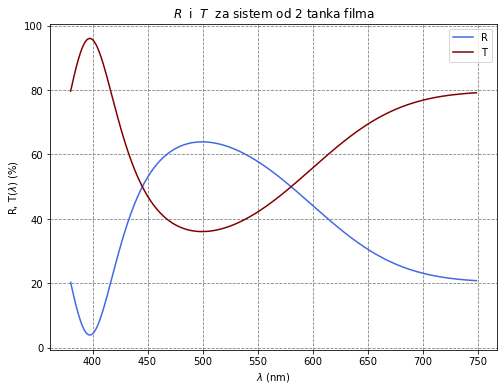

In [74]:
epsilon0 = 8.854e-12
mi0 = 12.56e-7
n0 = 1
n1 = 3.9716
n2 = 1.9971
ns = 1.5
d = 100e-9

def matrix_mul(m11,m12,m21,m22,m33,m34,m43,m44):
    return [m11*m33 + m12*m43, m11*m34 + m12*m44, m21*m33 + m22*m43, m21*m34 + m22*m44]


thetai1 = 0
thetat1 = np.arcsin(n0 * np.sin(thetai1) / n1)
thetai2 = thetat1
thetat2 = np.arcsin(n1 * np.sin(thetai2) / n2)
thetai3 = thetat2
thetat3 = np.arcsin(n2 * np.sin(thetai3) / ns)


Y0TE = np.sqrt(epsilon0 / mi0) * n0 * np.cos(thetai1)
Y0TM = np.sqrt(epsilon0 / mi0) * n0 / np.cos(thetai1)
Y1TE = np.sqrt(epsilon0 / mi0) * n1 * np.cos(thetat1)
Y1TM = np.sqrt(epsilon0 / mi0) * n1 / np.cos(thetat1)
Y2TE = np.sqrt(epsilon0 / mi0) * n2 * np.cos(thetat2)
Y2TM = np.sqrt(epsilon0 / mi0) * n2 / np.cos(thetat2)
YsTE = np.sqrt(epsilon0 / mi0) * ns * np.cos(thetat3)
YsTM = np.sqrt(epsilon0 / mi0) * ns / np.cos(thetat3)

h = n1 * d * np.cos(thetai2)
k0 = 2 * np.pi / lam

m111TE = np.cos(k0 * h)
m112TE = 1j * np.sin(k0 * h) / Y1TE
m121TE = 1j * Y1TE * np.sin(k0 * h)
m122TE = np.cos(k0 * h)

m111TM = np.cos(k0 * h)
m112TM = 1j * np.sin(k0 * h) / Y1TM
m121TM = 1j * Y1TM * np.sin(k0 * h)
m122TM = np.cos(k0 * h)

h = n2 * d * np.cos(thetai3)
k0 = 2 * np.pi / lam

m211TE = np.cos(k0 * h)
m212TE = 1j * np.sin(k0 * h) / Y2TE
m221TE = 1j * Y2TE * np.sin(k0 * h)
m222TE = np.cos(k0 * h)

m211TM = np.cos(k0 * h)
m212TM = 1j * np.sin(k0 * h) / Y2TM
m221TM = 1j * Y2TM * np.sin(k0 * h)
m222TM = np.cos(k0 * h)

m311TE, m312TE, m321TE, m322TE = matrix_mul(m111TE, m112TE, m121TE, m122TE, m211TE, m212TE, m221TE, m222TE)
m311TM, m312TM, m321TM, m322TM = matrix_mul(m111TM, m112TM, m121TM, m122TM, m211TM, m212TM, m221TM, m222TM)

rTE = (Y0TE*m311TE + Y0TE*YsTE*m312TE - m321TE - YsTE*m322TE) / (Y0TE*m311TE + Y0TE*YsTE*m312TE + m321TE + YsTE*m322TE)
rTM = (Y0TM*m311TM + Y0TM*YsTM*m312TM - m321TM - YsTM*m322TM) / (Y0TM*m311TM + Y0TM*YsTM*m312TM + m321TM + YsTM*m322TM)

RTE = np.abs(rTE) ** 2
RTM = np.abs(rTM) ** 2
R = 0.5 * (RTE + RTM)
T = 1 - R

plt.figure(figsize = (8,6))
plt.plot(lam / 1e-9, R * 100, color = 'royalblue', label = 'R')
plt.plot(lam / 1e-9, T * 100, color = 'maroon', label = 'T')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R, T($\lambda$) (%)')
plt.title('$R$  i  $T$  za sistem od 2 tanka filma')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.legend()
plt.show()

Ponoviti postupak i traženi grafik za sistem od 4 filma (2 puta ponovljena kombinacija materijala 1 i materijala 2: vazduh – materijal 1 – materijal 2 – materijal 1 – materijal 2 – pločica). 

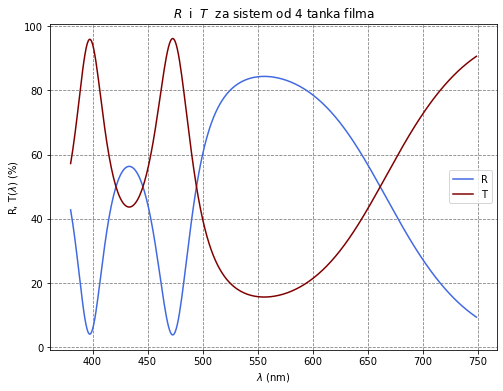

In [70]:
n3 = n1
n4 = n2

thetai1 = 0
thetat1 = np.arcsin(n0 * np.sin(thetai1) / n1)
thetai2 = thetat1
thetat2 = np.arcsin(n1 * np.sin(thetai2) / n2)
thetai3 = thetat2
thetat3 = np.arcsin(n2 * np.sin(thetai3) / n3)
thetai4 = thetat3
thetat4 = np.arcsin(n3 * np.sin(thetai4) / n4)
thetai5 = thetat4
thetat5 = np.arcsin(n4 * np.sin(thetai5) / ns)

Y0TE = np.sqrt(epsilon0 / mi0) * n0 * np.cos(thetai1)
Y0TM = np.sqrt(epsilon0 / mi0) * n0 / np.cos(thetai1)
Y1TE = np.sqrt(epsilon0 / mi0) * n1 * np.cos(thetat1)
Y1TM = np.sqrt(epsilon0 / mi0) * n1 / np.cos(thetat1)
Y2TE = np.sqrt(epsilon0 / mi0) * n2 * np.cos(thetat2)
Y2TM = np.sqrt(epsilon0 / mi0) * n2 / np.cos(thetat2)
Y3TE = np.sqrt(epsilon0 / mi0) * n3 * np.cos(thetat3)
Y3TM = np.sqrt(epsilon0 / mi0) * n3 / np.cos(thetat3)
Y4TE = np.sqrt(epsilon0 / mi0) * n4 * np.cos(thetat4)
Y4TM = np.sqrt(epsilon0 / mi0) * n4 / np.cos(thetat4)
YsTE = np.sqrt(epsilon0 / mi0) * ns * np.cos(thetat5)
YsTM = np.sqrt(epsilon0 / mi0) * ns / np.cos(thetat5)

h = n1 * d * np.cos(thetai2)
k0 = 2 * np.pi / lam

m111TE = np.cos(k0 * h)
m112TE = 1j * np.sin(k0 * h) / Y1TE
m121TE = 1j * Y1TE * np.sin(k0 * h)
m122TE = np.cos(k0 * h)

m111TM = np.cos(k0 * h)
m112TM = 1j * np.sin(k0 * h) / Y1TM
m121TM = 1j * Y1TM * np.sin(k0 * h)
m122TM = np.cos(k0 * h)

h = n2 * d * np.cos(thetai3)
k0 = 2 * np.pi / lam

m211TE = np.cos(k0 * h)
m212TE = 1j * np.sin(k0 * h) / Y2TE
m221TE = 1j * Y2TE * np.sin(k0 * h)
m222TE = np.cos(k0 * h)

m211TM = np.cos(k0 * h)
m212TM = 1j * np.sin(k0 * h) / Y2TM
m221TM = 1j * Y2TM * np.sin(k0 * h)
m222TM = np.cos(k0 * h)

h = n3 * d * np.cos(thetai4)
k0 = 2 * np.pi / lam

m311TE = np.cos(k0 * h)
m312TE = 1j * np.sin(k0 * h) / Y3TE
m321TE = 1j * Y3TE * np.sin(k0 * h)
m322TE = np.cos(k0 * h)

m311TM = np.cos(k0 * h)
m312TM = 1j * np.sin(k0 * h) / Y3TM
m321TM = 1j * Y3TM * np.sin(k0 * h)
m322TM = np.cos(k0 * h)

h = n4 * d * np.cos(thetai5)
k0 = 2 * np.pi / lam

m411TE = np.cos(k0 * h)
m412TE = 1j * np.sin(k0 * h) / Y4TE
m421TE = 1j * Y4TE * np.sin(k0 * h)
m422TE = np.cos(k0 * h)

m411TM = np.cos(k0 * h)
m412TM = 1j * np.sin(k0 * h) / Y4TM
m421TM = 1j * Y4TM * np.sin(k0 * h)
m422TM = np.cos(k0 * h)

m511TE, m512TE, m521TE, m522TE = matrix_mul(m111TE, m112TE, m121TE, m122TE, m211TE, m212TE, m221TE, m222TE)
m511TM, m512TM, m521TM, m522TM = matrix_mul(m111TM, m112TM, m121TM, m122TM, m211TM, m212TM, m221TM, m222TM)

m611TE, m612TE, m621TE, m622TE = matrix_mul(m511TE, m512TE, m521TE, m522TE, m311TE, m312TE, m321TE, m322TE)
m611TM, m612TM, m621TM, m622TM = matrix_mul(m511TM, m512TM, m521TM, m522TM, m311TM, m312TM, m321TM, m322TM)

m711TE, m712TE, m721TE, m722TE = matrix_mul(m611TE, m612TE, m621TE, m622TE, m411TE, m412TE, m421TE, m422TE)
m711TM, m712TM, m721TM, m722TM = matrix_mul(m611TM, m612TM, m621TM, m622TM, m411TM, m412TM, m421TM, m422TM)

rTE = (Y0TE*m711TE + Y0TE*YsTE*m712TE - m721TE - YsTE*m722TE) / (Y0TE*m711TE + Y0TE*YsTE*m712TE + m721TE + YsTE*m722TE)
rTM = (Y0TM*m711TM + Y0TM*YsTM*m712TM - m721TM - YsTM*m722TM) / (Y0TM*m711TM + Y0TM*YsTM*m712TM + m721TM + YsTM*m722TM)

RTE = np.abs(rTE) ** 2
RTM = np.abs(rTM) ** 2
R = 0.5 * (RTE + RTM)
T = 1 - R

plt.figure(figsize = (8,6))
plt.plot(lam / 1e-9, R * 100, color = 'royalblue', label = 'R')
plt.plot(lam / 1e-9, T * 100, color = 'maroon', label = 'T')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R, T($\lambda$) (%)')
plt.title('$R$  i  $T$  za sistem od 4 tanka filma')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.legend()
plt.show()

Ponoviti postupak i traženi grafik za sistem od 8 filmova (4 puta ponovljena kombinacija materijala 1 i materijala 2: vazduh – materijal 1 – materijal 2 – materijal 1 – materijal 2 – materijal 1 – materijal 2 – materijal 1 – materijal 2 – pločica).

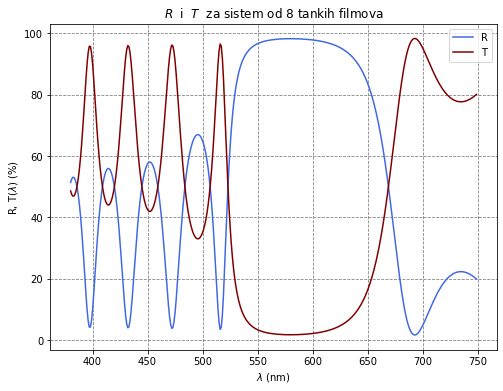

In [71]:
n3 = n1
n4 = n2
n5 = n1
n6 = n2
n7 = n1
n8 = n2

thetai1 = 0
thetat1 = np.arcsin(n0 * np.sin(thetai1) / n1)
thetai2 = thetat1
thetat2 = np.arcsin(n1 * np.sin(thetai2) / n2)
thetai3 = thetat2
thetat3 = np.arcsin(n2 * np.sin(thetai3) / n3)
thetai4 = thetat3
thetat4 = np.arcsin(n3 * np.sin(thetai4) / n4)
thetai5 = thetat4
thetat5 = np.arcsin(n4 * np.sin(thetai5) / n5)
thetai6 = thetat5
thetat6 = np.arcsin(n5 * np.sin(thetai6) / n6)
thetai7 = thetat6
thetat7 = np.arcsin(n6 * np.sin(thetai6) / n7)
thetai8 = thetat7
thetat8 = np.arcsin(n7 * np.sin(thetai7) / n8)
thetai9 = thetat8
thetat9 = np.arcsin(n8 * np.sin(thetai8) / ns)

Y0TE = np.sqrt(epsilon0 / mi0) * n0 * np.cos(thetai1)
Y0TM = np.sqrt(epsilon0 / mi0) * n0 / np.cos(thetai1)
Y1TE = np.sqrt(epsilon0 / mi0) * n1 * np.cos(thetat1)
Y1TM = np.sqrt(epsilon0 / mi0) * n1 / np.cos(thetat1)
Y2TE = np.sqrt(epsilon0 / mi0) * n2 * np.cos(thetat2)
Y2TM = np.sqrt(epsilon0 / mi0) * n2 / np.cos(thetat2)
Y3TE = np.sqrt(epsilon0 / mi0) * n3 * np.cos(thetat3)
Y3TM = np.sqrt(epsilon0 / mi0) * n3 / np.cos(thetat3)
Y4TE = np.sqrt(epsilon0 / mi0) * n4 * np.cos(thetat4)
Y4TM = np.sqrt(epsilon0 / mi0) * n4 / np.cos(thetat4)

Y5TE = np.sqrt(epsilon0 / mi0) * n5 * np.cos(thetat5)
Y5TM = np.sqrt(epsilon0 / mi0) * n5 / np.cos(thetat5)
Y6TE = np.sqrt(epsilon0 / mi0) * n6 * np.cos(thetat6)
Y6TM = np.sqrt(epsilon0 / mi0) * n6 / np.cos(thetat6)
Y7TE = np.sqrt(epsilon0 / mi0) * n7 * np.cos(thetat7)
Y7TM = np.sqrt(epsilon0 / mi0) * n7 / np.cos(thetat7)
Y8TE = np.sqrt(epsilon0 / mi0) * n8 * np.cos(thetat8)
Y8TM = np.sqrt(epsilon0 / mi0) * n8 / np.cos(thetat8)

YsTE = np.sqrt(epsilon0 / mi0) * ns * np.cos(thetat9)
YsTM = np.sqrt(epsilon0 / mi0) * ns / np.cos(thetat9)

h = n1 * d * np.cos(thetai2)
k0 = 2 * np.pi / lam

m111TE = np.cos(k0 * h)
m112TE = 1j * np.sin(k0 * h) / Y1TE
m121TE = 1j * Y1TE * np.sin(k0 * h)
m122TE = np.cos(k0 * h)

m111TM = np.cos(k0 * h)
m112TM = 1j * np.sin(k0 * h) / Y1TM
m121TM = 1j * Y1TM * np.sin(k0 * h)
m122TM = np.cos(k0 * h)

h = n2 * d * np.cos(thetai3)
k0 = 2 * np.pi / lam

m211TE = np.cos(k0 * h)
m212TE = 1j * np.sin(k0 * h) / Y2TE
m221TE = 1j * Y2TE * np.sin(k0 * h)
m222TE = np.cos(k0 * h)

m211TM = np.cos(k0 * h)
m212TM = 1j * np.sin(k0 * h) / Y2TM
m221TM = 1j * Y2TM * np.sin(k0 * h)
m222TM = np.cos(k0 * h)

h = n3 * d * np.cos(thetai4)
k0 = 2 * np.pi / lam

m311TE = np.cos(k0 * h)
m312TE = 1j * np.sin(k0 * h) / Y3TE
m321TE = 1j * Y3TE * np.sin(k0 * h)
m322TE = np.cos(k0 * h)

m311TM = np.cos(k0 * h)
m312TM = 1j * np.sin(k0 * h) / Y3TM
m321TM = 1j * Y3TM * np.sin(k0 * h)
m322TM = np.cos(k0 * h)

h = n4 * d * np.cos(thetai5)
k0 = 2 * np.pi / lam

m411TE = np.cos(k0 * h)
m412TE = 1j * np.sin(k0 * h) / Y4TE
m421TE = 1j * Y4TE * np.sin(k0 * h)
m422TE = np.cos(k0 * h)

m411TM = np.cos(k0 * h)
m412TM = 1j * np.sin(k0 * h) / Y4TM
m421TM = 1j * Y4TM * np.sin(k0 * h)
m422TM = np.cos(k0 * h)

####

h = n5 * d * np.cos(thetai6)
k0 = 2 * np.pi / lam

m511TE = np.cos(k0 * h)
m512TE = 1j * np.sin(k0 * h) / Y5TE
m521TE = 1j * Y5TE * np.sin(k0 * h)
m522TE = np.cos(k0 * h)

m511TM = np.cos(k0 * h)
m512TM = 1j * np.sin(k0 * h) / Y5TM
m521TM = 1j * Y5TM * np.sin(k0 * h)
m522TM = np.cos(k0 * h)

h = n6 * d * np.cos(thetai7)
k0 = 2 * np.pi / lam

m611TE = np.cos(k0 * h)
m612TE = 1j * np.sin(k0 * h) / Y6TE
m621TE = 1j * Y6TE * np.sin(k0 * h)
m622TE = np.cos(k0 * h)

m611TM = np.cos(k0 * h)
m612TM = 1j * np.sin(k0 * h) / Y6TM
m621TM = 1j * Y6TM * np.sin(k0 * h)
m622TM = np.cos(k0 * h)

h = n7 * d * np.cos(thetai8)
k0 = 2 * np.pi / lam

m711TE = np.cos(k0 * h)
m712TE = 1j * np.sin(k0 * h) / Y7TE
m721TE = 1j * Y7TE * np.sin(k0 * h)
m722TE = np.cos(k0 * h)

m711TM = np.cos(k0 * h)
m712TM = 1j * np.sin(k0 * h) / Y7TM
m721TM = 1j * Y7TM * np.sin(k0 * h)
m722TM = np.cos(k0 * h)

h = n8 * d * np.cos(thetai9)
k0 = 2 * np.pi / lam

m811TE = np.cos(k0 * h)
m812TE = 1j * np.sin(k0 * h) / Y8TE
m821TE = 1j * Y8TE * np.sin(k0 * h)
m822TE = np.cos(k0 * h)

m811TM = np.cos(k0 * h)
m812TM = 1j * np.sin(k0 * h) / Y8TM
m821TM = 1j * Y8TM * np.sin(k0 * h)
m822TM = np.cos(k0 * h)

##########

m911TE, m912TE, m921TE, m922TE = matrix_mul(m111TE, m112TE, m121TE, m122TE, m211TE, m212TE, m221TE, m222TE)
m911TM, m912TM, m921TM, m922TM = matrix_mul(m111TM, m112TM, m121TM, m122TM, m211TM, m212TM, m221TM, m222TM)

m1011TE, m1012TE, m1021TE, m1022TE = matrix_mul(m911TE, m912TE, m921TE, m922TE, m311TE, m312TE, m321TE, m322TE)
m1011TM, m1012TM, m1021TM, m1022TM = matrix_mul(m911TM, m912TM, m921TM, m922TM, m311TM, m312TM, m321TM, m322TM)

m1111TE, m1112TE, m1121TE, m1122TE = matrix_mul(m1011TE, m1012TE, m1021TE, m1022TE, m411TE, m412TE, m421TE, m422TE)
m1111TM, m1112TM, m1121TM, m1122TM = matrix_mul(m1011TM, m1012TM, m1021TM, m1022TM, m411TM, m412TM, m421TM, m422TM)

m1211TE, m1212TE, m1221TE, m1222TE = matrix_mul(m1111TE, m1112TE, m1121TE, m1122TE, m511TE, m512TE, m521TE, m522TE)
m1211TM, m1212TM, m1221TM, m1222TM = matrix_mul(m1111TM, m1112TM, m1121TM, m1122TM, m511TM, m512TM, m521TM, m522TM)

m1311TE, m1312TE, m1321TE, m1322TE = matrix_mul(m1211TE, m1212TE, m1221TE, m1222TE, m611TE, m612TE, m621TE, m622TE)
m1311TM, m1312TM, m1321TM, m1322TM = matrix_mul(m1211TM, m1212TM, m1221TM, m1222TM, m611TM, m612TM, m621TM, m622TM)

m1411TE, m1412TE, m1421TE, m1422TE = matrix_mul(m1311TE, m1312TE, m1321TE, m1322TE, m711TE, m712TE, m721TE, m722TE)
m1411TM, m1412TM, m1421TM, m1422TM = matrix_mul(m1311TM, m1312TM, m1321TM, m1322TM, m711TM, m712TM, m721TM, m722TM)

m1511TE, m1512TE, m1521TE, m1522TE = matrix_mul(m1411TE, m1412TE, m1421TE, m1422TE, m811TE, m812TE, m821TE, m822TE)
m1511TM, m1512TM, m1521TM, m1522TM = matrix_mul(m1411TM, m1412TM, m1421TM, m1422TM, m811TM, m812TM, m821TM, m822TM)

rTE = (Y0TE*m1511TE + Y0TE*YsTE*m1512TE - m1521TE - YsTE*m1522TE) / (Y0TE*m1511TE + Y0TE*YsTE*m1512TE + m1521TE + YsTE*m1522TE)
rTM = (Y0TM*m1511TM + Y0TM*YsTM*m1512TM - m1521TM - YsTM*m1522TM) / (Y0TM*m1511TM + Y0TM*YsTM*m1512TM + m1521TM + YsTM*m1522TM)

RTE = np.abs(rTE) ** 2
RTM = np.abs(rTM) ** 2
R = 0.5 * (RTE + RTM)
T = 1 - R

plt.figure(figsize = (8,6))
plt.plot(lam / 1e-9, R * 100, color = 'royalblue', label = 'R')
plt.plot(lam / 1e-9, T * 100, color = 'maroon', label = 'T')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R, T($\lambda$) (%)')
plt.title('$R$  i  $T$  za sistem od 8 tankih filmova')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.legend()
plt.show()

Prokomentarisati razliku u reflektansama za ove 3 strukture. Šta se dešava sa profilom reflektanse i transmitanse kako broj tankih filmova raste? Šta bi moglo da se napravi na osnovu ovog efekta?

<font color='blue'>Naime, kako broj filmova raste, raste i broj maksimuma/minimuma reflektanse i transmitanse. Takođe, dodatna posledica je stvaranje "ravnih linija", za velike vrednosti reflektanse, tj. male vrednosti transmitanse što inherentno ukazuje da se velika količina svetlosti reflektuje, a samo mala propušta. To označava da filter može dovoljno dobro da blokira ceo jedan spektar talasnih dužina. Upravo to može da se koristi u analognim fotoaparatima kako bi se na primer blokirala crvena svetlost.</font> 